In [14]:
import pandas as pd 

df = pd.read_csv('~/Desktop/Capstone/df_modelling (w age buckets).csv')
    


In [15]:
df.head()
# print(df.shape)

,TransportID,from_floor,dest_floor,first_pending_day_of_week,first_pending_hour_of_day,completion_time_median,wait_time_min,completion_time_min,queue_size,pending,...,assigned_pctg,acknowledged_pctg,inprogress_pctg,mode_is_Bariatric Stretcher,mode_is_Bariatric Wheelchair,mode_is_Bed,mode_is_Stretcher,mode_is_Wheelchair,mode_is_Wheelchair with O2,age_bucket
0,4131343,Lunder 9,Lunder LL3,3,8,9.0,26,5,4,0,...,0.000000,0.750000,0.250000,0,0,0,1,0,0,13
1,4131568,Ellison 16,Lunder LL3,4,8,11.0,38,9,13,0,...,0.000000,0.615385,0.384615,0,0,0,1,0,0,11
2,4131605,Ellison 16,Lunder LL3,3,8,11.0,25,6,4,0,...,0.000000,0.750000,0.250000,0,0,0,1,0,0,11
3,4131630,Ellison 16,Lunder LL3,4,12,11.0,34,10,22,1,...,0.090909,0.363636,0.500000,0,0,0,1,0,0,11
4,4131641,Ellison 16,Lunder LL3,4,8,11.0,32,14,17,1,...,0.000000,0.647059,0.294118,0,0,0,1,0,0,12


In [16]:
import numpy as np

X = df.iloc[:, np.r_[5, 8, 13:29]]
y1 = df.wait_time_min
y2 = df.completion_time_min
y3 = y1 + y2 # total time


    
X.columns


Index(['completion_time_median', 'queue_size', 'Num_Active_Wrkrs_Hourly',
       'day_sin', 'day_cos', 'hour_sin', 'hour_cos', 'pending_pctg',
       'assigned_pctg', 'acknowledged_pctg', 'inprogress_pctg',
       'mode_is_Bariatric Stretcher', 'mode_is_Bariatric Wheelchair',
       'mode_is_Bed', 'mode_is_Stretcher', 'mode_is_Wheelchair',
       'mode_is_Wheelchair with O2', 'age_bucket'],
      dtype='object')

In [17]:
import time

# record start time
start = time.time()
 
# record end time
end = time.time()
 
# print elapsed time in seconds
print("Elapsed time", (end - start), "s.")


Elapsed time 2.6226043701171875e-05 s.


In [95]:

#Splitting the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, Y1_train, Y1_test= train_test_split(X, y1, test_size=0.25, random_state=2022)
X_train, X_test, Y2_train, Y2_test= train_test_split(X, y2, test_size=0.25, random_state=2022)
X_train, X_test, Y3_train, Y3_test= train_test_split(X, y3, test_size=0.25, random_state=2022)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(X_train.shape)
print(X_test.shape)
print(Y1_train.shape)
print(Y1_test.shape)
print(Y2_train.shape)
print(Y2_test.shape)
print(Y3_train.shape)
print(Y3_test.shape)



(172171, 18)
(57391, 18)
(172171,)
(57391,)
(172171,)
(57391,)
(172171,)
(57391,)


In [44]:
# from sklearn.neighbors import KNeighborsRegressor


# knn_default = KNeighborsRegressor() # default 5
# knn_default.fit(X_train, Y1_train)
# y1_pred_knn_default = knn_default.predict(X_test)

# knn_default2 = KNeighborsRegressor() # default 5
# knn_default2.fit(X_train, Y2_train)
# y2_pred_knn_default = knn_default2.predict(X_test)





In [98]:
# We use cross validation and grid search to find the best model.  
# Scikit-Learn affords us with several tunable parameters.  

from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

# Questions: any computing resource we can use? Tree based methods and neural networks will also be costive.

estimator_knn = KNeighborsRegressor(algorithm='auto') # ‘auto’ will attempt to decide the most appropriate algorithm based on the values passed to fit method.
parameters_knn = {
    'n_neighbors': (3, 5, 10)         # 
    #'weights': ('uniform', 'distance'), # ‘uniform’ : uniform weights. All points in each neighborhood are weighted equally.
                                         # ‘distance’ : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.
    # p : {1, 2} 1: manhattan distance, 2: euclidean distance
} # 
 
# Waiting time: 
# with GridSearch
grid_search_knn = GridSearchCV(
    estimator = estimator_knn,
    param_grid = parameters_knn,
    scoring = 'neg_mean_squared_error',
    n_jobs = -1, # using all processors
    cv = 3,  # 5
    error_score='raise'
)
    
start = time.time()

knn_cv1 = grid_search_knn.fit(X_train_scaled, Y1_train)

end = time.time()
 
# print elapsed time in seconds
print("Elapsed time of KNN for training wait time", (end - start), "s.")


print(grid_search_knn.best_params_ ) 



Elapsed time of KNN for training wait time 494.6548080444336 s.
{'n_neighbors': 10}


In [99]:
# Completion time
grid_search_knn2 = GridSearchCV(
    estimator = estimator_knn,
    param_grid = parameters_knn,
    scoring = 'neg_mean_squared_error',
    n_jobs = -1, # using all processors
    cv = 3 # 5
)

start = time.time()
knn_cv2 = grid_search_knn2.fit(X_train_scaled, Y2_train)
end = time.time()

print("Elapsed time of KNN for training completion time", (end - start), "s.")

print(grid_search_knn2.best_params_ ) 



Elapsed time of KNN for training completion time 1015.2751791477203 s.
{'n_neighbors': 10}


In [100]:
# Total time
grid_search_knn3 = GridSearchCV(
    estimator = estimator_knn,
    param_grid = parameters_knn,
    scoring = 'neg_mean_squared_error',
    n_jobs = -1, # using all processors
    cv = 3 # 5
)

start = time.time()
knn_cv3 = grid_search_knn3.fit(X_train_scaled, Y3_train)
end = time.time()

print("Elapsed time of KNN for training total time", (end - start), "s.")

print(grid_search_knn3.best_params_ ) 




Elapsed time of KNN for training total time 619.1982371807098 s.
{'n_neighbors': 10}


In [23]:
# Performance evaluation
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
    

# Default 
# print("MAE of default KNN for waiting time: {}".format(mean_absolute_error(Y1_test, y1_pred_knn_default)))
# print("RMSE of default KNN for waiting time: {}".format(mean_squared_error(Y1_test, y1_pred_knn_default, squared=False)))
# print("MAE of default KNN for completion time: {}".format(mean_absolute_error(Y2_test, y2_pred_knn_default)))
# print("RMSE of default KNN for completion time: {}".format(mean_squared_error(Y2_test, y2_pred_knn_default, squared=False)))
      


In [102]:
# Best params model
      
y1_pred_knn = knn_cv1.predict(X_test_scaled)
y2_pred_knn = knn_cv2.predict(X_test_scaled)
y3_pred_knn = knn_cv3.predict(X_test_scaled)

      
y1_train_pred_knn = knn_cv1.predict(X_train_scaled)
y2_train_pred_knn = knn_cv2.predict(X_train_scaled)
y3_train_pred_knn = knn_cv3.predict(X_train_scaled)


#print("MAE of best KNN for waiting time: {}".format(mean_absolute_error(Y1_test, y1_pred_knn)))
#print("RMSE of best KNN for waiting time: {}".format(mean_squared_error(Y1_test, y1_pred_knn, squared=False)))
#print("MAE of best KNN for completion time: {}".format(mean_absolute_error(Y2_test, y2_pred_knn)))
#print("RMSE of best KNN for completion time: {}".format(mean_squared_error(Y2_test, y2_pred_knn, squared=False)))
#print("MAE of best KNN for completion time: {}".format(mean_absolute_error(Y2_test, y2_pred_knn)))
#print("RMSE of best KNN for completion time: {}".format(mean_squared_error(Y2_test, y2_pred_knn, squared=False)))




In [25]:
# XGBoost
# stop of training: 
# 1. number of training, default value 100
# 2. maximum depth of each tree 

import numpy as np
import pandas as pd
from sklearn import preprocessing
import xgboost as xgb
from xgboost.sklearn import XGBRegressor
import datetime
from sklearn.model_selection import GridSearchCV


# Various hyper-parameters to tune
# default gamma = 0
# default lambda = 1
estimator_xgb = XGBRegressor()
parameters_xgb = {
              'objective':['reg:linear'],
              'learning_rate': [0.03, 0.05, 0.07], #so called `eta` value
              'max_depth': [2, 4, 6],
              'subsample': [0.7], # randomly sample 70% of the training data prior to growing trees to prevent overfitting.
              'colsample_bytree': [0.7], #  only consider 70% of columns when constructing each tree to decorrelate trees
              }


xgb_cv1 = GridSearchCV(estimator_xgb,
                        parameters_xgb,
                        cv = 3,
                        n_jobs = -1,
                        verbose=True,
                        error_score='raise')
start = time.time()
xgb_cv1.fit(X_train, Y1_train)
end = time.time()

print("Elapsed time of XGBoost for training wait time", (end - start), "s.")




Fitting 3 folds for each of 9 candidates, totalling 27 fits
[18:09:08] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
Elapsed time of XGBoost for training wait time 64.7962749004364 s.


In [50]:
#pip install xgboost

     |████████████████████████████████| 1.7 MB 4.3 MB/s eta 0:00:01
You should consider upgrading via the '/Users/yitinghan/opt/anaconda3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [26]:

xgb_cv2 = GridSearchCV(estimator_xgb,
                        parameters_xgb,
                        cv = 3,
                        n_jobs = -1,
                        verbose=True,
                       error_score='raise')

start = time.time()
xgb_cv2.fit(X_train, Y2_train)
end = time.time()


print("Elapsed time of XGBoost for training completion time", (end - start), "s.")




Fitting 3 folds for each of 9 candidates, totalling 27 fits
[18:10:02] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
Elapsed time of XGBoost for training completion time 53.454667806625366 s.


In [27]:

xgb_cv3 = GridSearchCV(estimator_xgb,
                        parameters_xgb,
                        cv = 3,
                        n_jobs = -1,
                        verbose=True,
                       error_score='raise')

start = time.time()
xgb_cv3.fit(X_train, Y3_train)
end = time.time()


print("Elapsed time of XGBoost for training total time", (end - start), "s.")





Fitting 3 folds for each of 9 candidates, totalling 27 fits
[18:10:53] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
Elapsed time of XGBoost for training total time 50.655210971832275 s.


In [28]:

print(xgb_cv1.best_score_)
print(xgb_cv1.best_params_)
print(xgb_cv2.best_score_)
print(xgb_cv2.best_params_)
print(xgb_cv3.best_score_)
print(xgb_cv3.best_params_)

0.44465503728481465
{'colsample_bytree': 0.7, 'learning_rate': 0.07, 'max_depth': 6, 'objective': 'reg:linear', 'subsample': 0.7}
0.1907624750480812
{'colsample_bytree': 0.7, 'learning_rate': 0.07, 'max_depth': 6, 'objective': 'reg:linear', 'subsample': 0.7}
0.40043899135859434
{'colsample_bytree': 0.7, 'learning_rate': 0.07, 'max_depth': 6, 'objective': 'reg:linear', 'subsample': 0.7}


In [103]:
# Best params model
      
y1_pred_xgb = xgb_cv1.predict(X_test)
y2_pred_xgb = xgb_cv2.predict(X_test)
y3_pred_xgb = xgb_cv3.predict(X_test)

y1_train_pred_xgb = xgb_cv1.predict(X_train)
y2_train_pred_xgb = xgb_cv2.predict(X_train)
y3_train_pred_xgb = xgb_cv3.predict(X_train)



In [111]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


def metrics_tab(train_pred, test_pred, y_train, y_test):
   
    train_mse = mean_squared_error(y_train, train_pred)
    train_rmse = np.sqrt(train_mse)
    train_mape = mean_absolute_percentage_error(y_train, train_pred)
    train_r2 = r2_score(y_train, train_pred)
    train_mae = mean_absolute_error(y_train, train_pred)
    
    test_mse = mean_squared_error(y_test, test_pred)
    test_rmse = np.sqrt(test_mse)
    test_mape = mean_absolute_percentage_error(y_test, test_pred)
    test_r2 = r2_score(y_test, test_pred)
    test_mae = mean_absolute_error(y_test, test_pred)
    

    table = pd.DataFrame([[train_mse, train_rmse, train_mae, train_r2, train_mape],
                          [test_mse, test_rmse, test_mae, test_r2, test_mape]],
                            index = ["Train","Test"], 
                         columns = ["MSE","RMSE", "MAE", "R2", "MAPE"])

    return table



In [112]:
knn_perf1 = metrics_tab(y1_train_pred_knn, y1_pred_knn, Y1_train, Y1_test)
knn_perf2 = metrics_tab(y2_train_pred_knn, y2_pred_knn, Y2_train, Y2_test)
knn_perf3 = metrics_tab(y3_train_pred_knn, y3_pred_knn, Y3_train, Y3_test)


xgb_perf1 = metrics_tab(y1_train_pred_xgb, y1_pred_xgb, Y1_train, Y1_test)
xgb_perf2 = metrics_tab(y2_train_pred_xgb, y2_pred_xgb, Y2_train, Y2_test)
xgb_perf3 = metrics_tab(y3_train_pred_xgb, y3_pred_xgb, Y3_train, Y3_test)



print("KNN for waiting time")
print(knn_perf1)
print("KNN for completion time")
print(knn_perf2)
print("KNN for total time")
print(knn_perf3)

print("XGBoost for waiting time")
print(xgb_perf1)
print("XGBoost for completion time")
print(xgb_perf2)
print("XGBoost for total time")
print(xgb_perf3)




KNN for waiting time
              MSE       RMSE       MAE        R2          MAPE
Train  112.582001  10.610467  7.866583  0.494754  1.426642e+13
Test   137.109405  11.709373  8.680988  0.381250  3.287986e+13
KNN for completion time
             MSE      RMSE       MAE        R2      MAPE
Train  23.648893  4.863013  3.725760  0.275554  0.576374
Test   28.858254  5.371988  4.126684  0.114846  0.630992
KNN for total time
              MSE       RMSE       MAE        R2      MAPE
Train  127.223722  11.279349  8.481692  0.454358  0.258881
Test   153.963919  12.408220  9.324812  0.331207  0.287112
XGBoost for waiting time
              MSE       RMSE       MAE        R2          MAPE
Train  119.671710  10.939457  8.154895  0.462937  1.679494e+13
Test   122.971164  11.089236  8.266102  0.445053  3.250356e+13
XGBoost for completion time
             MSE      RMSE       MAE        R2      MAPE
Train  25.832361  5.082555  3.877410  0.208667  0.613397
Test   26.278256  5.126232  3.917661  0.193

Feature importance of XGBoost for predicting wait time
[['mode_is_Wheelchair with O2' '0.0042576585']
 ['mode_is_Bariatric Wheelchair' '0.005326199']
 ['age_bucket' '0.005877837']
 ['mode_is_Bariatric Stretcher' '0.007058388']
 ['day_cos' '0.009911615']
 ['day_sin' '0.010018514']
 ['assigned_pctg' '0.016493674']
 ['hour_cos' '0.020095427']
 ['Num_Active_Wrkrs_Hourly' '0.02745699']
 ['acknowledged_pctg' '0.038387533']
 ['inprogress_pctg' '0.039989606']
 ['hour_sin' '0.043919425']
 ['mode_is_Wheelchair' '0.05606237']
 ['mode_is_Stretcher' '0.07179353']
 ['queue_size' '0.0792247']
 ['mode_is_Bed' '0.120478325']
 ['completion_time_median' '0.16645455']
 ['pending_pctg' '0.2771936']]


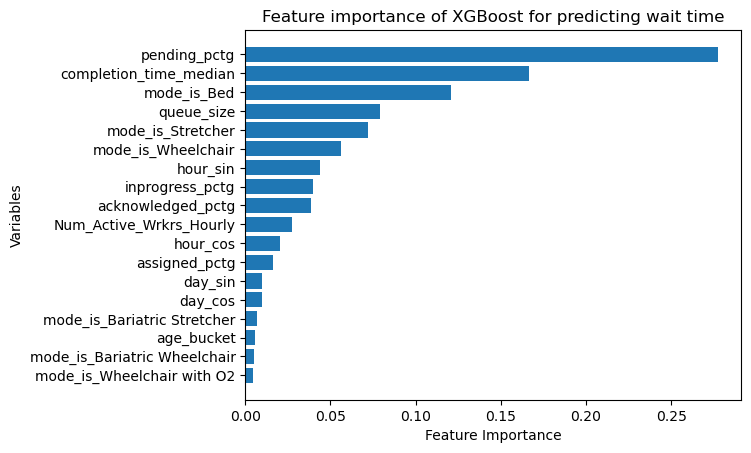

In [138]:
# Feature importance 
import matplotlib.pyplot as plt

features = X.columns     
xgb_y1 = xgb_cv1.best_estimator_.feature_importances_
xgb_waittime_importances = []
for col, imp in zip(features, xgb_y1):
    xgb_waittime_importances.append([col, imp])


xgb_waittime_importances.sort(key=lambda x: x[1])
print("Feature importance of XGBoost for predicting wait time")
print(np.array(xgb_waittime_importances))
variables = [i[0] for i in xgb_waittime_importances]
xgb_y1 = [i[1] for i in xgb_waittime_importances]


#plt.rcdefaults()

fig, ax = plt.subplots()
bars = ax.barh(variables, xgb_y1)
#ax.bar_label(bars)
plt.ylabel("Variables")
plt.xlabel('Feature Importance')
plt.title('Feature importance of XGBoost for predicting wait time')
plt.show()


Feature importance of XGBoost for predicting completion time
[['mode_is_Wheelchair with O2' '0.0067259246']
 ['mode_is_Bariatric Wheelchair' '0.009348182']
 ['assigned_pctg' '0.0094212955']
 ['acknowledged_pctg' '0.009892436']
 ['age_bucket' '0.010897856']
 ['day_sin' '0.011409621']
 ['pending_pctg' '0.011538741']
 ['mode_is_Bariatric Stretcher' '0.011786323']
 ['inprogress_pctg' '0.011918014']
 ['queue_size' '0.01271625']
 ['day_cos' '0.019284997']
 ['Num_Active_Wrkrs_Hourly' '0.020170946']
 ['mode_is_Bed' '0.02239027']
 ['hour_sin' '0.026629664']
 ['hour_cos' '0.026766764']
 ['mode_is_Wheelchair' '0.07736638']
 ['mode_is_Stretcher' '0.09067641']
 ['completion_time_median' '0.61105984']]


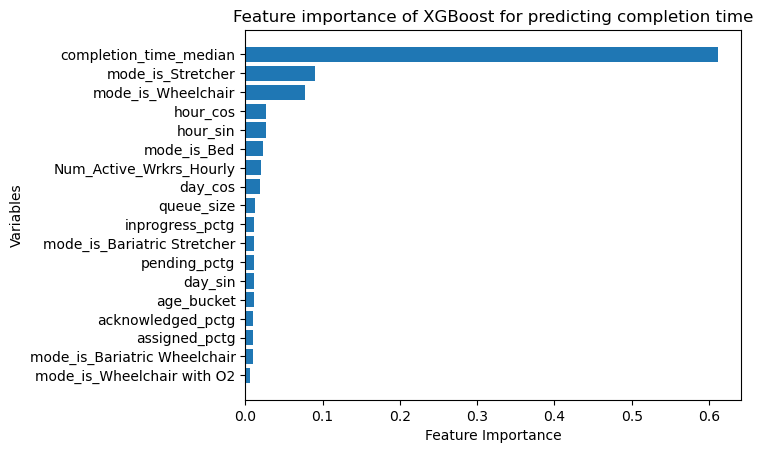

In [141]:
xgb_y2 = xgb_cv2.best_estimator_.feature_importances_
xgb_completiontime_importances = []
for col, imp in zip(features, xgb_y2):
    xgb_completiontime_importances.append([col, imp])


print("Feature importance of XGBoost for predicting completion time")
xgb_completiontime_importances.sort(key=lambda x: x[1])
xgb_completiontime_importances

print(np.array(xgb_completiontime_importances))


variables = [i[0] for i in xgb_completiontime_importances]
xgb_y2 = [i[1] for i in xgb_completiontime_importances]


#plt.rcdefaults()

fig, ax = plt.subplots()
bars = ax.barh(variables, xgb_y2)
#ax.bar_label(bars)
plt.ylabel("Variables")
plt.xlabel('Feature Importance')
plt.title('Feature importance of XGBoost for predicting completion time')
plt.show()



Feature importance of XGBoost for predicting total time
[['mode_is_Wheelchair with O2' '0.0043373485']
 ['mode_is_Bariatric Wheelchair' '0.005633183']
 ['age_bucket' '0.0063510435']
 ['mode_is_Bariatric Stretcher' '0.008248553']
 ['day_cos' '0.008681413']
 ['day_sin' '0.010303808']
 ['assigned_pctg' '0.017563112']
 ['Num_Active_Wrkrs_Hourly' '0.027938947']
 ['hour_cos' '0.028737836']
 ['acknowledged_pctg' '0.03602912']
 ['inprogress_pctg' '0.03743927']
 ['hour_sin' '0.04959002']
 ['mode_is_Wheelchair' '0.05774209']
 ['queue_size' '0.087239936']
 ['mode_is_Stretcher' '0.10163657']
 ['completion_time_median' '0.102029994']
 ['mode_is_Bed' '0.112717316']
 ['pending_pctg' '0.29778045']]


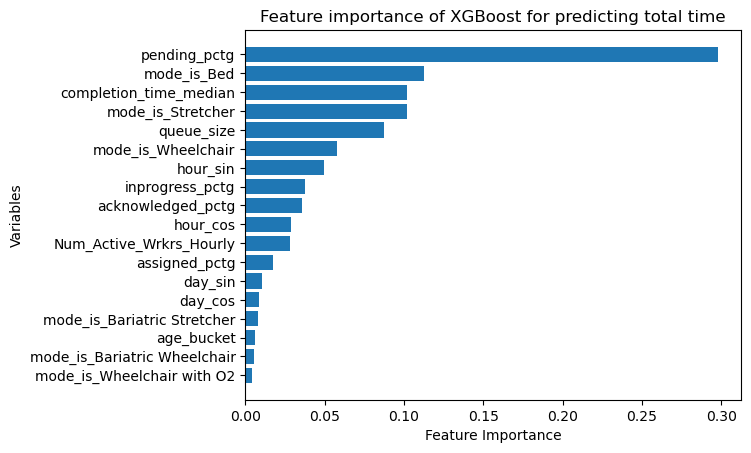

In [142]:
xgb_y3 = xgb_cv3.best_estimator_.feature_importances_
xgb_totaltime_importances = []
for col, imp in zip(features, xgb_y3):
    xgb_totaltime_importances.append([col, imp])


print("Feature importance of XGBoost for predicting total time")
xgb_totaltime_importances.sort(key=lambda x: x[1])
xgb_totaltime_importances



print(np.array(xgb_totaltime_importances))


variables = [i[0] for i in xgb_totaltime_importances]
xgb_y2 = [i[1] for i in xgb_totaltime_importances]


#plt.rcdefaults()

fig, ax = plt.subplots()
bars = ax.barh(variables, xgb_y2)
#ax.bar_label(bars)
plt.ylabel("Variables")
plt.xlabel('Feature Importance')
plt.title('Feature importance of XGBoost for predicting total time')
plt.show()




In [66]:
# Feature importance for a specific sample, not for a model

# Feature importance for KNN: https://stackoverflow.com/questions/55314345/how-to-find-feature-importance-or-variable-importance-graph-for-knnclassifier#:~:text=If%20you%20are%20set%20on,feature%20(call%20these%20neighb_dist%20).
# taking the sample to predict on, and computing its distance from each of its nearest neighbors for each feature (call these neighb_dist). 
# Then do the same computations for a few random points (call these rand_dist) instead of the nearest neighbors. 
# Then for each feature, you take the ratio of neighb_dist / rand_dist, 
# and the smaller the ratio, the more important that feature is.



In [87]:
# Residual plot

import seaborn as sns

def residual_plot(X, y, pred):
    residuals = pd.Series(y - pred)
    df_residuals = pd.concat([X, residuals], axis = 1)
    old_name = df_residuals.columns[-1]
    df_residuals.rename(columns={old_name:'residuals'}, inplace=True)
    pp = sns.pairplot(data=df_residuals,
                  y_vars=['residuals'],
                  x_vars=['completion_time_median', 'queue_size', 'Num_Active_Wrkrs_Hourly',
                          'day_sin', 'day_cos', 'hour_sin', 'hour_cos',
                         'pending_pctg', 'assigned_pctg', 'acknowledged_pctg', 'inprogress_pctg', 'age_bucket'])
 

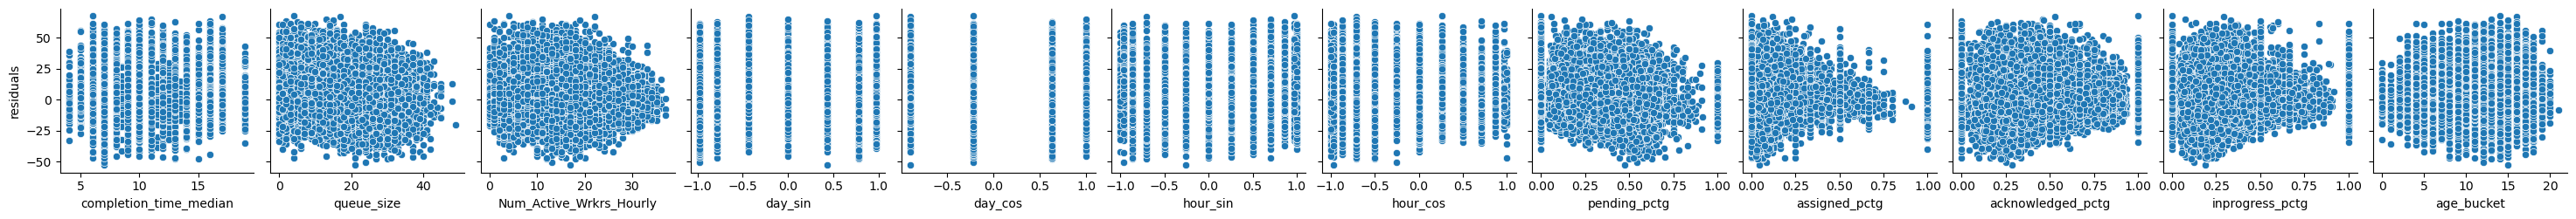

In [128]:
# KNN for waiting time
residual_plot(X_test, Y1_test, y1_pred_knn)

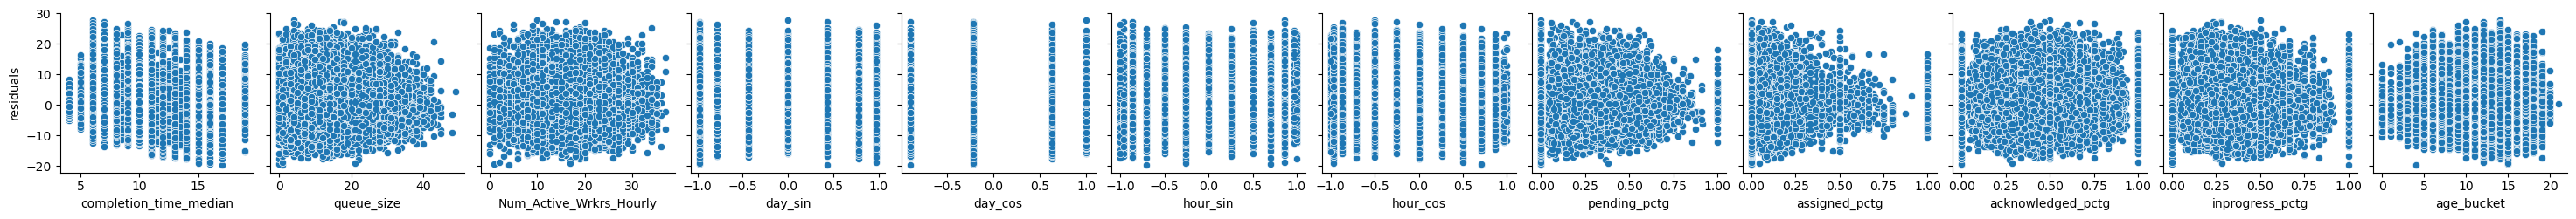

In [129]:
# KNN for completion time
residual_plot(X_test, Y2_test, y2_pred_knn)

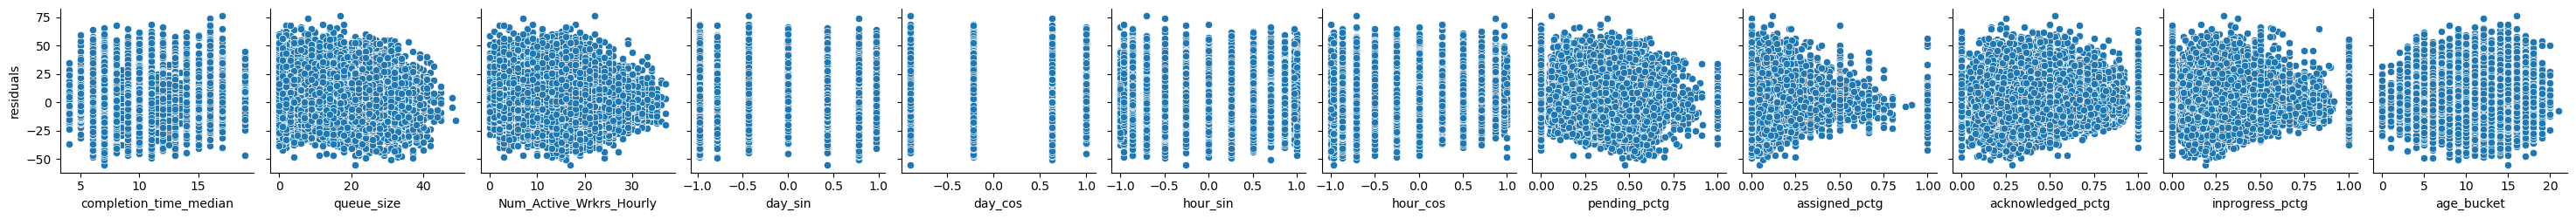

In [130]:
# KNN for total time
residual_plot(X_test, Y3_test, y3_pred_knn)

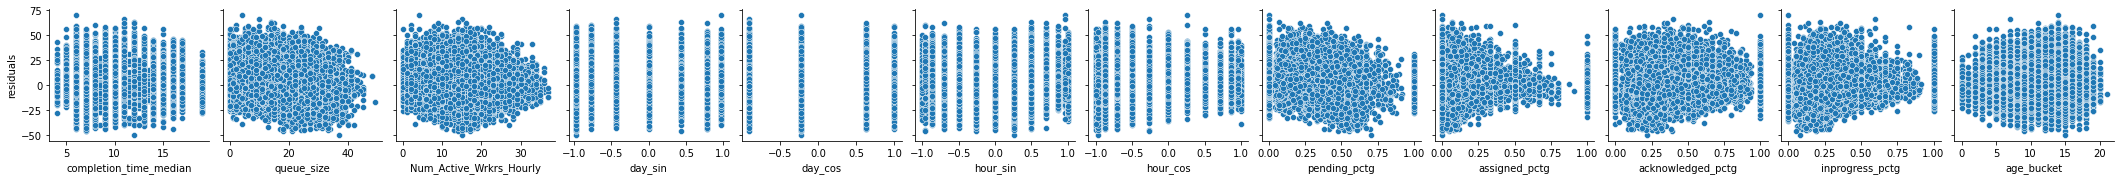

In [91]:
# XGBoost for waiting time
residual_plot(X_test, Y1_test, y1_pred_xgb)

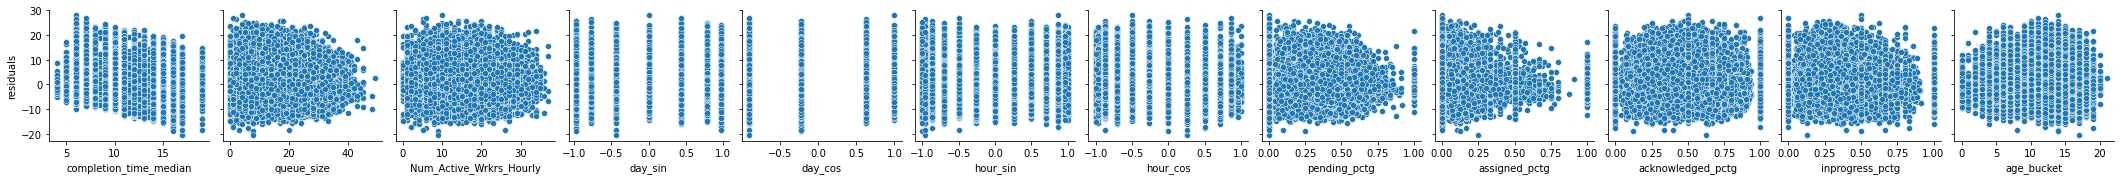

In [92]:
# XGBoost for completion time
residual_plot(X_test, Y2_test, y2_pred_xgb)

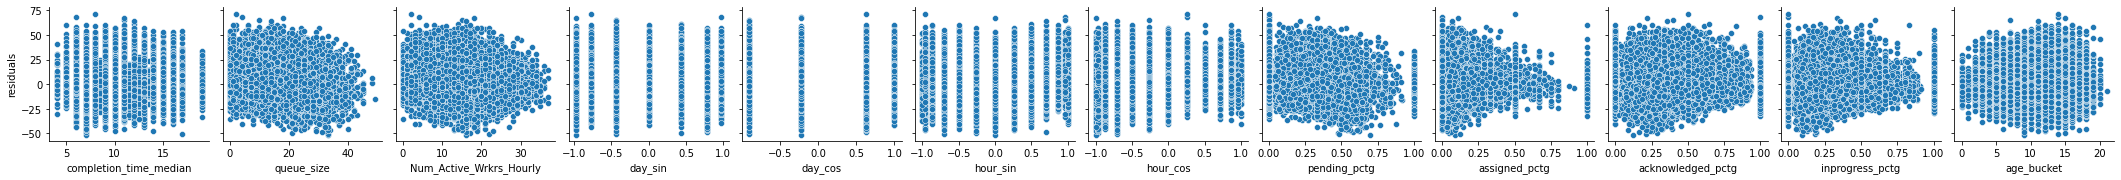

In [93]:
# XGBoost for total time
residual_plot(X_test, Y3_test, y3_pred_xgb)

In [132]:
pip install matplotlib==3.4.1

     |████████████████████████████████| 7.2 MB 3.7 MB/s eta 0:00:01
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.3.4
    Uninstalling matplotlib-3.3.4:
      Successfully uninstalled matplotlib-3.3.4
You should consider upgrading via the '/Users/yitinghan/opt/anaconda3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
